In [94]:
import numpy as np
import pandas as pd 
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [95]:
df = pd.read_csv("preprocessed.csv")
df.head(5)

,Year,Month,Day,Time of Tweet,text,sentiment,Platform,text_length,Text_Stemmed
0,2018,8,18,morning,great day looks dream,positive,Twitter,37,great day look dream
1,2018,8,18,noon,sorry miss sea beach,positive,Facebook,46,sorri miss sea beach
2,2017,8,18,night,don't angry,negative,Facebook,14,don't angri
3,2022,6,8,morning,attend class listening teachers reading slide ...,negative,Facebook,84,attend class listen teacher read slide nonsens
4,2022,6,8,noon,want go let go,negative,Instagram,33,want go let go


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           746 non-null    int64 
 1   Month          746 non-null    int64 
 2   Day            746 non-null    int64 
 3   Time of Tweet  746 non-null    object
 4   text           742 non-null    object
 5   sentiment      746 non-null    object
 6   Platform       746 non-null    object
 7   text_length    746 non-null    int64 
 8   Text_Stemmed   742 non-null    object
dtypes: int64(4), object(5)
memory usage: 52.6+ KB


In [97]:
df.shape

(746, 9)

In [98]:
from sklearn.preprocessing import LabelEncoder 
text = df["text"]
sentiment = df["sentiment"]
sentiment = LabelEncoder().fit_transform(sentiment)

In [99]:
labels = sentiment

In [100]:
import spacy
nlp = spacy.load(r'C:\\Users\\Pc\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\en_core_web_sm\\en_core_web_sm-3.7.1')

In [101]:
def text_preprocessing(text):
    if isinstance(text, str):
        processed_text = ' '.join([token.lemma_ for token in nlp(text) if not token.is_stop])
    elif isinstance(text, pd.Series) and text.apply(lambda x: isinstance(x, str)).all():
        processed_text = text.str.lower().apply(lambda x: ' '.join([token.lemma_ for token in nlp(x) if not token.is_stop]))
    else:
        raise ValueError("Input must be a string or a pd.Series of strings")
    return processed_text

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC 
from sklearn.metrics import accuracy_score , classification_report
from sklearn.model_selection import train_test_split 

In [103]:
vectorizer = TfidfVectorizer()
text = text.fillna('MISSING')
processed_text = text_preprocessing(text)
features = vectorizer.fit_transform(text)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [104]:
model = LinearSVC()

In [105]:
model.fit(X_train , y_train )

LinearSVC()

In [106]:
# Evalution 
predictions = model.predict(X_test)
print("Accuracy: " , accuracy_score(y_test , predictions ))
print(classification_report (y_test , predictions ))

Accuracy:  0.5758928571428571
              precision    recall  f1-score   support

           0       0.71      0.39      0.50        57
           1       0.50      0.55      0.52        73
           2       0.59      0.71      0.65        94

    accuracy                           0.58       224
   macro avg       0.60      0.55      0.56       224
weighted avg       0.59      0.58      0.57       224



In [107]:
# prediction :
new_text = ["I am happy"]
new_features = vectorizer.transform(new_text)
prediction = model.predict(new_features )
if prediction[0]==0 :
    print("neutral")
elif prediction[0]==1 :
    print("negative")
else :
    print("positive")

positive


Accuracy: 0.5758928571428571


<Figure size 1000x800 with 0 Axes>

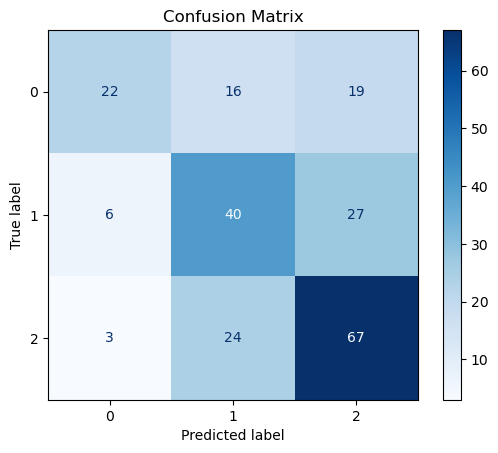

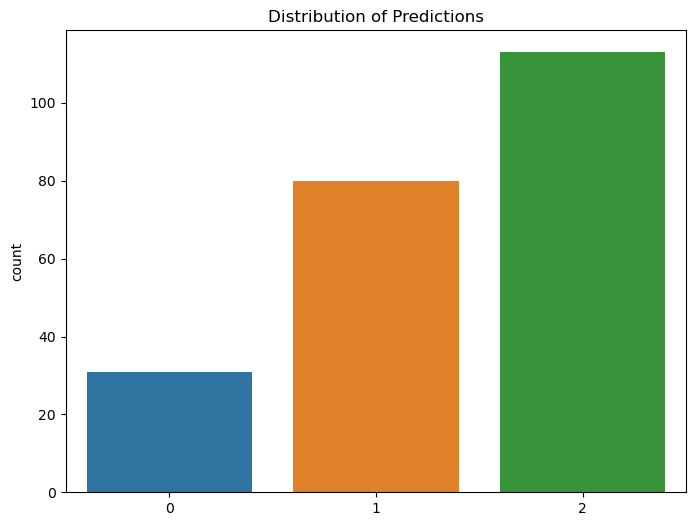

In [108]:
# Predict sentiment on test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
cmd = ConfusionMatrixDisplay(cm, display_labels=model.classes_)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cmd.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Plot distribution of predictions
plt.figure(figsize=(8, 6))
sns.countplot(x=y_pred, order=model.classes_)
plt.title('Distribution of Predictions')
plt.show()


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2'}
Best cross-validation score: 0.5786630036630036
Accuracy: 0.59375


c:\Users\Pc\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Pc\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Pc\anaconda3\Lib\site-packages\sklearn\svm\_classes.py", line 274, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
                                           ^^^^^^^^^^^^^^^
  File "c:\Users\Pc\anaconda3\Lib\site-packages\sklearn\svm\_base.py", line 1223, in _fit_liblinear
    sol

<Figure size 1000x800 with 0 Axes>

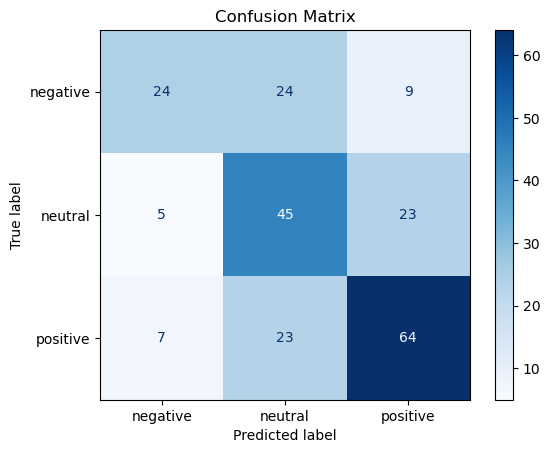

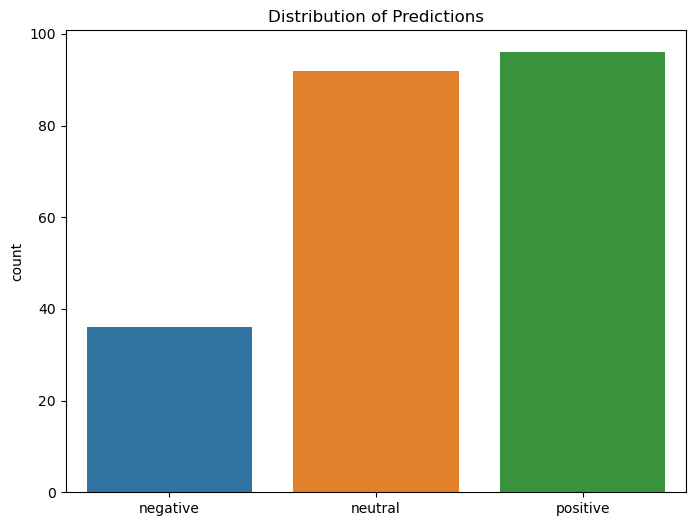

In [109]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.sparse import hstack
import matplotlib.pyplot as plt
import seaborn as sns

# Read data from CSV
data = pd.read_csv("preprocessed.csv")

# Replace NaNs in 'Text_Stemmed' column with empty string
data['Text_Stemmed'].fillna("", inplace=True)

# Preprocess text data
vectorizer = CountVectorizer()
X_text = vectorizer.fit_transform(data['Text_Stemmed'])

# Numeric features: Year, Month, Day
X_numeric = data[['Year', 'Month', 'Day']]

# Categorical features: Time of Tweet and Platform
time_encoder = OneHotEncoder()
X_time = time_encoder.fit_transform(data[['Time of Tweet']])
platform_encoder = OneHotEncoder()
X_platform = platform_encoder.fit_transform(data[['Platform']])

# Scale numeric features
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

# Combine text, categorical, and numeric features
X = hstack((X_text, X_time, X_platform, X_numeric_scaled))

# Sentiment labels
y = data['sentiment']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'class_weight': ['balanced']  
}
# Initialize the model
model = LinearSVC(max_iter=1000, multi_class='ovr')

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score}")

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predict sentiment on test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
cmd = ConfusionMatrixDisplay(cm, display_labels=best_model.classes_)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cmd.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Plot distribution of predictions
plt.figure(figsize=(8, 6))
sns.countplot(x=y_pred, order=best_model.classes_)
plt.title('Distribution of Predictions')
plt.show()